<a href="https://colab.research.google.com/github/kdduha/cs102/blob/homework06/homework06/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 2


Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [86]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# 1. выгрузим датасет
db_music <- read.csv("https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1jogqyngwmQg6fzr_1PolQOFhDyNGSAza")
head(db_music, n=5)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,32894,Röyksopp,Röyksopp's Night Out,27,0.00468,0.652,-1,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
2,46652,Thievery Corporation,The Shining Path,31,0.01270,0.622,218293,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
3,30097,Dillon Francis,Hurricane,28,0.00306,0.620,215613,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
4,62177,Dubloadz,Nitro,34,0.02540,0.774,166875,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
5,24907,What So Not,Divide & Conquer,32,0.00465,0.638,222369,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
# 2. выберем 20_000 случайных строк (поставим фиксированный сид)
set.seed(1)
db <- db_music[sample(nrow(db_music), 20000), ]
nrow(db)

[1] 20000

In [4]:
# 3. проверяем и удаляем дубл.строки
db = db[!duplicated(db), ]
nrow(db)

[1] 19999

In [5]:
# 4. Ищем и удаляем строки с empty_artists
empty_artist <- db[db$artist_name == "empty_field", ]
if (nrow(empty_artist) > 0) {
  cat("Строк с пустым значением в столбце artist_name:", nrow(empty_artist))
  
  # удаление строк с пустым значением в столбце artist_name
  db <- db[db$artist_name != "empty_field", ]
  cat(nrow(empty_artist), "строк удалено.")
}
nrow(db)

Строк с пустым значением в столбце artist_name: 972972 строк удалено.

[1] 19027

### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [121]:
# 1. Доли каждого жанра в датасете
genres = db$music_genre
genre_counts <- table(genres[genres != ""])
genre_proportions <- data.frame(prop.table(genre_counts))

message("Доля каждого жанра в датасете:")
genre_proportions

Доля каждого жанра в датасете:



Var1,Freq
<fct>,<dbl>
Alternative,0.10117734
Anime,0.10128246
Blues,0.09965311
Classical,0.09991590
Country,0.09707768
Electronic,0.10007358
Hip-Hop,0.10270157
Jazz,0.09912751
Rap,0.09923263


[1] "grey" "grey" "grey" "grey" "grey" "grey" "red"  "grey" "grey" "grey"

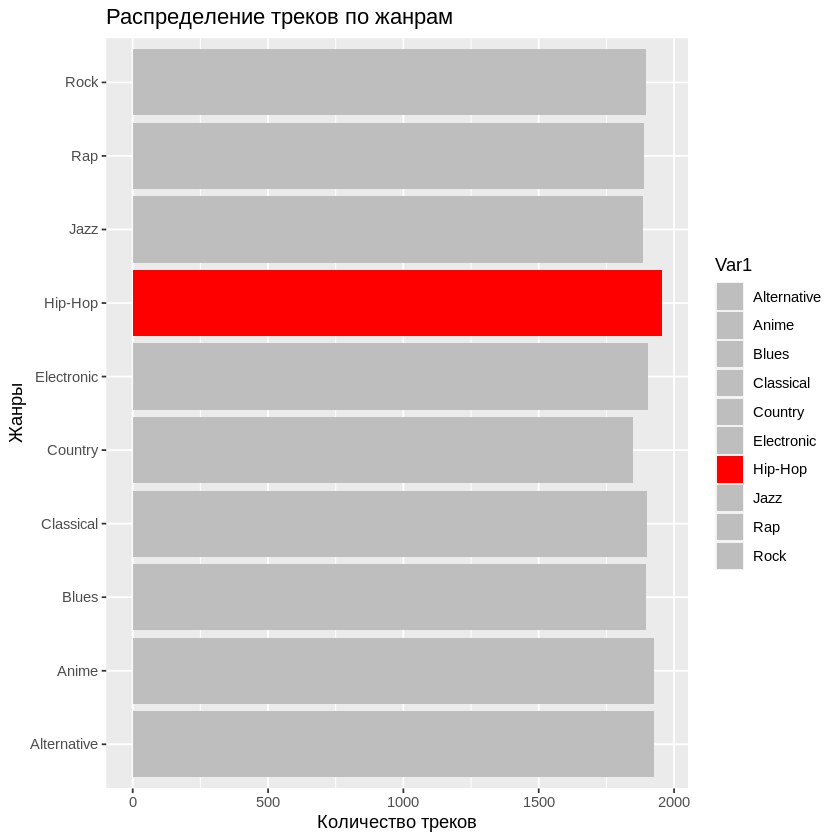

In [135]:
# 2. Строим столбиковую диаграмму
colors <- c(rep("grey", nrow(genre_proportions)))
colors[[which.max(genre_proportions$Freq)]] <- "red"

ggplot(data = genre_proportions, aes(x = Var1, y = Freq * nrow(db), fill = Var1)) +
  coord_flip() + 
  geom_bar(stat = "identity") +
  xlab("Жанры") + ylab("Количество треков") +
  ggtitle("Распределение треков по жанрам") +
  scale_fill_manual(values = colors)

In [9]:
# 3. самый танцевальный жанр
mean_danceability <- aggregate(db$danceability, by = list(db$music_genre), mean)
most_danceable_genre <- mean_danceability$Group.1[which.max(mean_danceability$x)]

cat("Самый танцевальный жанр -", most_danceable_genre)


Самый танцевальный жанр - Hip-Hop

In [50]:
# 4. Преобладающие тональности
get_tonal_mode <- function(genres) {
  major_count <- sum(genres$mode == "Major")
  minor_count <- sum(genres$mode == "Minor")
  
  if (major_count > minor_count) {
    tonal_mode <- "Major"
  } else if (minor_count > major_count) {
    tonal_mode <- "Minor"
  } else {
    tonal_mode <- "Equal"
  }

  return(data.frame(Genre = unique(genres$music_genre), mode = tonal_mode))
}

# группировка по жанру и вызов функции для каждой группы
grouped <- by(db, db$music_genre, get_tonal_mode)

# создание и вывод DataFrame объекта
result <- data.frame(do.call("rbind", grouped))
result <- result[2:nrow(result),]
rownames(result) <- NULL
result

Genre,mode
<chr>,<chr>
Alternative,Major
Anime,Major
Blues,Major
Classical,Major
Country,Major
Electronic,Major
Hip-Hop,Major
Jazz,Major
Rap,Major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [54]:
# 1. исполнители с наиб. и наим. кол-во треков
most_tracks_artist <- names(sort(table(db$artist_name), decreasing = TRUE))[1]
cat("Исполнитель с наибольшим количеством треков:", most_tracks_artist, "\n")

least_tracks_artist <- names(sort(table(db$artist_name), decreasing = FALSE))[2]
cat("Исполнитель с наименьшим количеством треков:", least_tracks_artist, "\n")

Исполнитель с наибольшим количеством треков: Wolfgang Amadeus Mozart 
Исполнитель с наименьшим количеством треков: (Hed) P.E. 


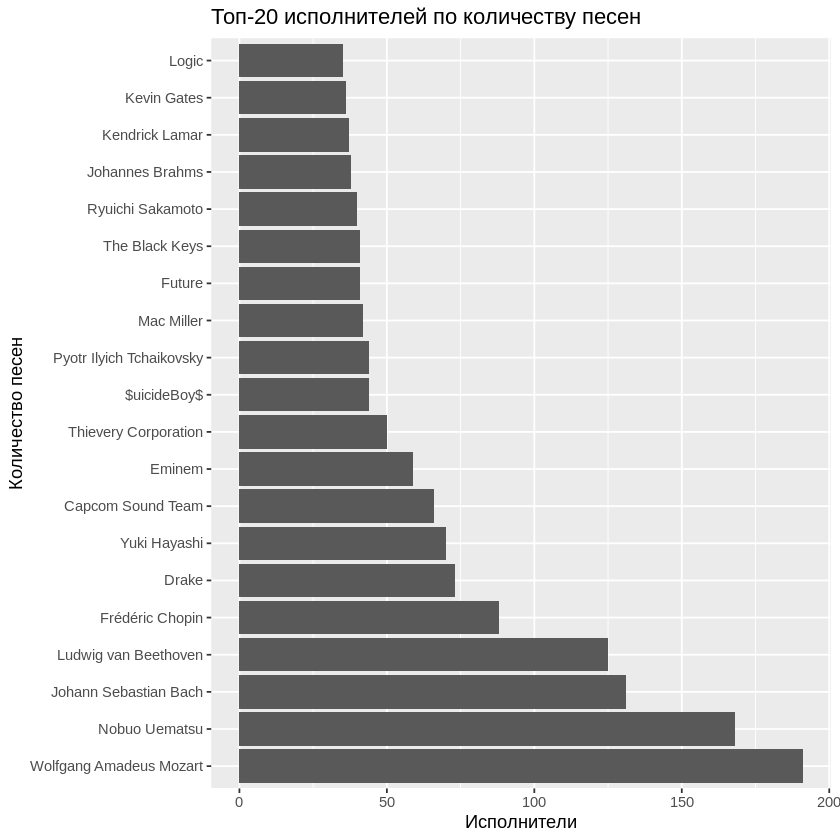

In [94]:
# 2. топ-20 исполнителей
top_artists <- data.frame(sort(table(db$artist_name), decreasing = TRUE))
top_artists <- top_artists[0:20,]

ggplot(top_artists, aes(x = Var1, y = Freq)) +
  geom_bar(stat = "identity") +
  coord_flip() + 
  ggtitle("Топ-20 исполнителей по количеству песен") +
  xlab("Количество песен") +
  ylab("Исполнители")

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [146]:
# 1. кор. матрица
chars <- c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence")
data <- as.data.frame(na.omit(db[, chars]))
cor_matrix <- cor(data)
cor_matrix

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.00000000,-0.29284866,0.36019773,-0.08958772,0.21652967,-0.37022623,-0.04682583,0.3161405,0.23164582,0.12352293
acousticness,-0.29284866,1.00000000,-0.34553816,0.06167963,-0.78974157,0.39048159,-0.10888306,-0.7294294,-0.16256491,-0.26352434
danceability,0.36019773,-0.34553816,1.00000000,-0.16426810,0.26714220,-0.30729654,-0.04484188,0.3927162,0.27478889,0.44395094
duration_ms,-0.08958772,0.06167963,-0.16426810,1.00000000,-0.07082937,0.13395944,0.01422884,-0.1107098,-0.08852670,-0.13388978
energy,0.21652967,-0.78974157,0.26714220,-0.07082937,1.00000000,-0.39636450,0.18715359,0.8409180,0.17011805,0.39199671
instrumentalness,-0.37022623,0.39048159,-0.30729654,0.13395944,-0.39636450,1.00000000,-0.09481417,-0.5326323,-0.20467734,-0.27718851
liveness,-0.04682583,-0.10888306,-0.04484188,0.01422884,0.18715359,-0.09481417,1.00000000,0.1268713,0.11215558,0.05005246
loudness,0.31614051,-0.72942941,0.39271616,-0.11070983,0.84091803,-0.53263233,0.12687133,1.0000000,0.17785127,0.34031170
speechiness,0.23164582,-0.16256491,0.27478889,-0.08852670,0.17011805,-0.20467734,0.11215558,0.1778513,1.00000000,0.05501088
valence,0.12352293,-0.26352434,0.44395094,-0.13388978,0.39199671,-0.27718851,0.05005246,0.3403117,0.05501088,1.00000000


In [150]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



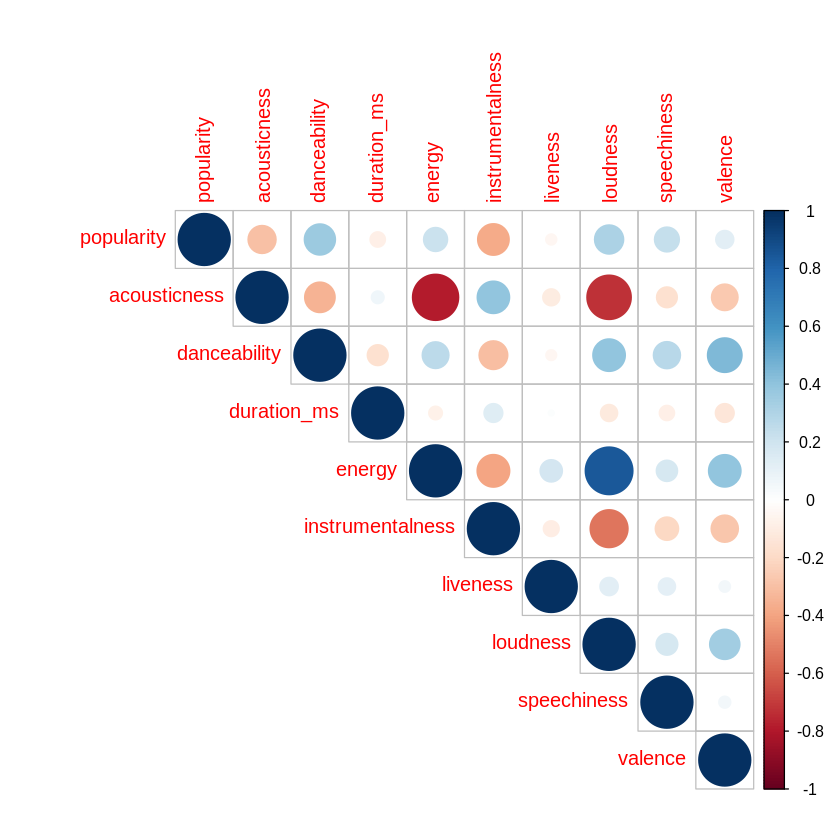

In [151]:
corrplot(cor_matrix, type = "upper", method = "circle")

In [156]:
# 2. расстояние
data <- as.data.frame(na.omit(db))
cor(data$popularity, nchar(data$track_name))

[1] -0.2306499

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

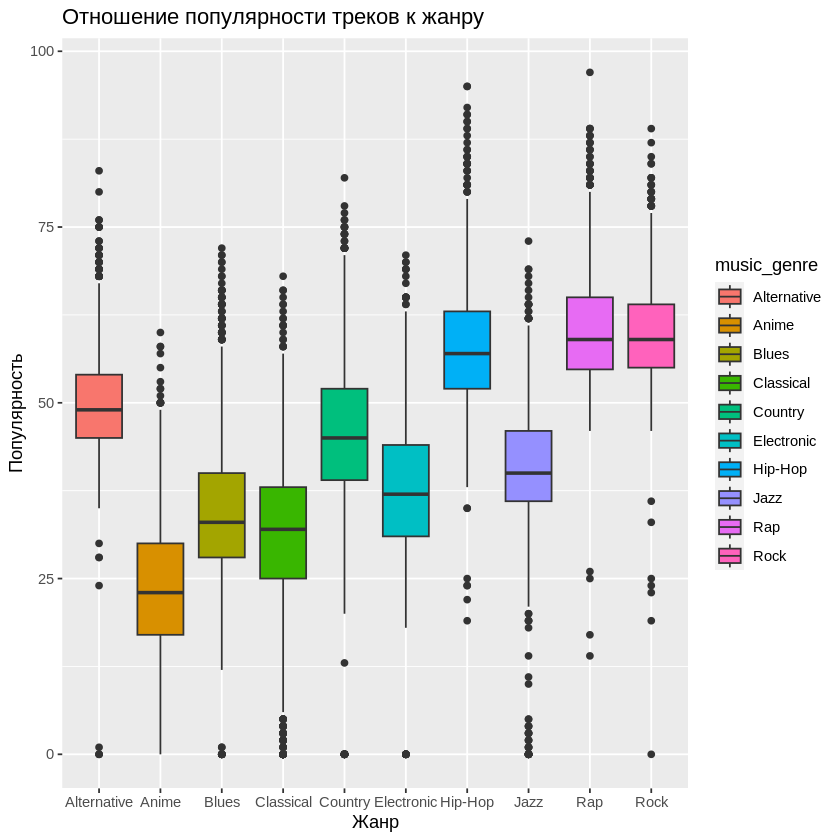

In [161]:
ggplot(data=data, aes(x=music_genre, y=popularity, fill=music_genre)) + 
  geom_boxplot() +
  labs(title="Отношение популярности треков к жанру", x="Жанр", y="Популярность")

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”


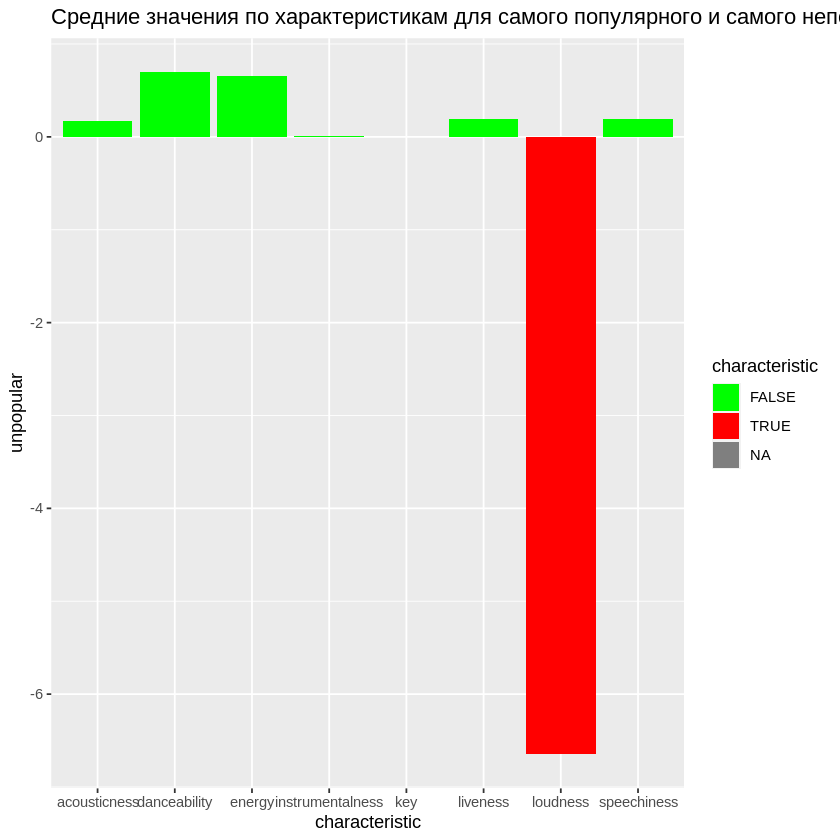

In [189]:

most <- db$music_genre[which.max(genre_proportions$Freq)]
least <- db$music_genre[which.min(genre_proportions$Freq)]

popular_genre <- db[db$music_genre == most, ]
unpopular_genre <- db[db$music_genre == least, ]

chars <- c("acousticness", "danceability", "energy", "instrumentalness", "key", "liveness", "loudness", "speechiness")

# средние значения по всем характеристикам для самого (не)популярного жанра
popular_mean <- sapply(popular_genre[, chars], mean)
unpopular_mean <- sapply(unpopular_genre[, chars], mean)

means_df <- data.frame(
  characteristic = chars,
  popular = popular_mean,
  unpopular = unpopular_mean
)

ggplot(means_df, aes(x = characteristic, y = unpopular, fill = characteristic)) +
  geom_col(aes(y = unpopular, fill = unpopular < 0), position = "dodge") +
  scale_fill_manual(values = c("green", "red")) +
  ggtitle("Средние значения по характеристикам для самого популярного и самого непопулярного жанров")

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [191]:
# 1. Добавим столбцы
db$длительность_трека <- cut(db$duration_ms/1000/60, c(-Inf, 3, 5, Inf),
                             labels = c("короткая", "средняя", "длинная"))
head(db)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<fct>
24388,28036,Aaron Lewis,Whiskey And You,52,0.403,0.692,-1,0.3330,1.09e-05,D,0.0885,-7.950,Major,0.0272,125.931,4-Apr,0.1580,Country,короткая
43307,69328,Vladimir Martynov,The Beatitudes,34,0.988,0.241,315693,0.0518,9.57e-01,A#,0.0834,-32.200,Major,0.0453,89.585,4-Apr,0.0875,Classical,длинная
4050,87740,Jauz,Eager,41,0.026,0.776,223000,0.8740,2.02e-02,B,0.0707,-4.122,Minor,0.0572,139.94799999999998,4-Apr,0.3890,Electronic,средняя
11571,66618,Jordan Rakei,Eye To Eye,47,0.401,0.632,351895,0.3690,5.08e-03,C#,0.1080,-10.715,Major,0.0404,147.965,4-Apr,0.1400,Jazz,длинная
25173,31089,Mac Miller,She Said,48,0.058,0.502,166903,0.8600,0.00e+00,A,0.3230,-3.984,Major,0.3020,179.02700000000002,4-Apr,0.5150,Rap,короткая
32618,27829,Traveling Wilburys,New Blue Moon,34,0.329,0.466,200427,0.9240,9.84e-03,B,0.3110,-4.124,Major,0.0608,81.218,4-Apr,0.6690,Blues,средняя


Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”


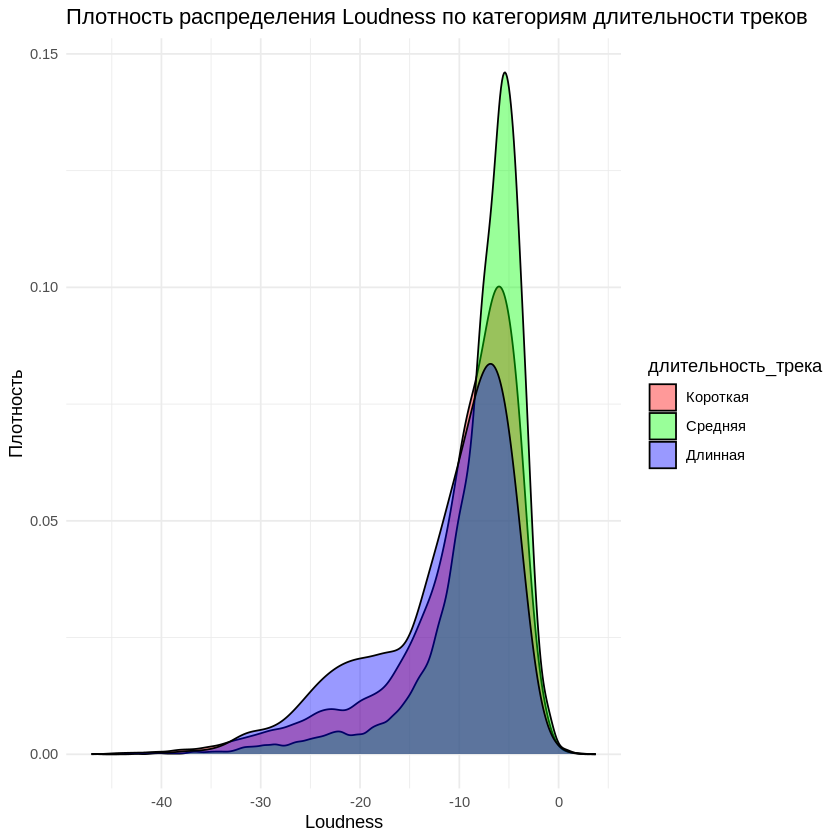

In [192]:
# 2. График плотности (будем добавлять слои для каждой группы данных)

p <- ggplot(db, aes(x = loudness, fill = длительность_трека))
p <- p + geom_density(alpha = 0.4)
p <- p + labs(title = "Плотность распределения Loudness по категориям длительности треков",
              x = "Loudness",
              y = "Плотность") +
     scale_fill_manual(values = c("red", "green", "blue"),
                       labels = c("Короткая", "Средняя", "Длинная")) +
     theme_minimal()
print(p)

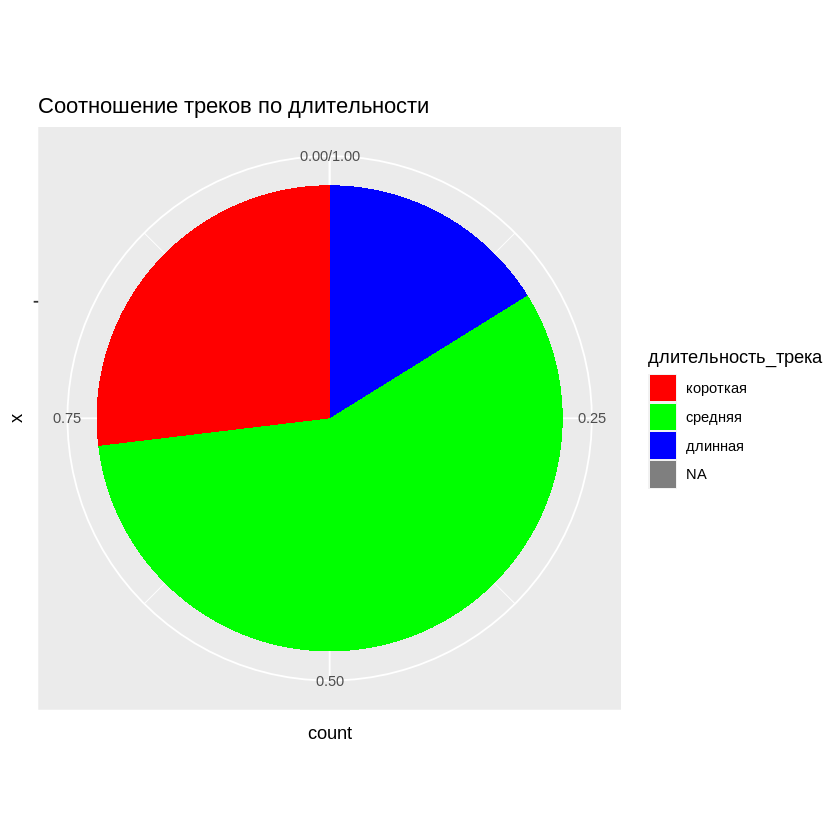

In [202]:
# 3. Делам круговую диаграмму
ggplot(db, aes(x = "", fill = длительность_трека)) + 
  geom_bar(width = 10, position = "fill") + 
  coord_polar(theta = "y") +
  scale_fill_manual(values = c("red", "green", "blue")) +
  labs(title = "Соотношение треков по длительности")